In [52]:
import sys
import numpy as np
import cv2
import sklearn.metrics as sklm

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# from keras import backend as K
# img_dim_ordering = 'tf'
# K.set_image_dim_ordering(img_dim_ordering)


In [53]:
from tensorflow import keras

### 1. 데이터 불러오기

In [54]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [55]:
x_train2 = x_train

In [58]:
import cv2

In [60]:
cv2.imwrite("d:/test.jpg",x_train2[0])

True

In [50]:
# 레이블 정의
fashion_mnist_labels = ["T-shirt/top",  # 인덱스 0
                        "Trouser",      # 인덱스 1
                        "Pullover",     # 인덱스 2 
                        "Dress",        # 인덱스 3 
                        "Coat",         # 인덱스 4
                        "Sandal",       # 인덱스 5
                        "Shirt",        # 인덱스 6 
                        "Sneaker",      # 인덱스 7 
                        "Bag",          # 인덱스 8 
                        "Ankle boot"]   # 인덱스 9

### 2. 데이터 사이즈 조정

In [89]:
# converting it to RGB
x_train = [cv2.cvtColor(cv2.resize(i, (32,32)), cv2.COLOR_GRAY2BGR) for i in x_train]
x_train = np.concatenate([arr[np.newaxis] for arr in x_train]).astype('float32')

In [90]:
x_test = [cv2.cvtColor(cv2.resize(i, (32,32)), cv2.COLOR_GRAY2BGR) for i in x_test]
x_test = np.concatenate([arr[np.newaxis] for arr in x_test]).astype('float32')

In [91]:
from tensorflow.keras.utils import to_categorical

In [92]:
y_train_one = to_categorical(y_train)
y_test_one = to_categorical(y_test)

### 3. 모델 생성

In [93]:
import keras
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.layers import MaxPooling2D, Conv2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
img_shape = x_train.shape[1:]
img_shape

(32, 32, 3)

In [9]:
num_classes = len(set(y_train))
num_classes

10

In [10]:
layer_type="relu"
layer_type

'relu'

In [43]:
model = Sequential()
model.add(Flatten(input_shape=img_shape))
# model.add(Dense(units=32,activation="relu"))
# model.add(Dense(units=32,activation="relu"))
# model.add(Dense(units=32,activation="relu"))
# model.add(Dense(units=10, activation="softmax"))
model.add(Conv2D(filters=32, kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        4128      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)             

### 4. 모델 컴파일

In [44]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [45]:
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

### 5. 모델 훈련(callback 정의)

In [46]:
from datetime import datetime
currentdate = datetime.now().strftime("%Y_%m_%d_%H_%M")
currentdate

'2019_10_16_12_42'

In [47]:
callback_list = [
    EarlyStopping(monitor="val_loss", patience=10), 
    TensorBoard(log_dir="logs_{}".format(currentdate),
            write_images=True, write_graph=True),
    ModelCheckpoint("./model_weights.h5", monitor="val_loss", verbose=1, save_best_only=True)
    
]

In [49]:
#model.fit(x= train_images, y= train_labels_one_hot, batch_size=32,validation_split=0.2, epochs=4)
model.fit(x= x_train, y= y_train_one, batch_size=1000, validation_data=(x_test,y_test_one), epochs=10
         ,callbacks = callback_list
         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 29s 476us/step - loss: 0.4232 - accuracy: 0.8490 - val_loss: 0.3599 - val_accuracy: 0.8768

Epoch 00001: val_loss improved from 0.39088 to 0.35987, saving model to ./model_weights.h5
Epoch 2/10
60000/60000 [==============================] - 29s 489us/step - loss: 0.4052 - accuracy: 0.8568 - val_loss: 0.3549 - val_accuracy: 0.8791

Epoch 00002: val_loss improved from 0.35987 to 0.35492, saving model to ./model_weights.h5
Epoch 3/10
60000/60000 [==============================] - 30s 502us/step - loss: 0.3974 - accuracy: 0.8567 - val_loss: 0.3488 - val_accuracy: 0.8794

Epoch 00003: val_loss improved from 0.35492 to 0.34882, saving model to ./model_weights.h5
Epoch 4/10
60000/60000 [==============================] - 30s 501us/step - loss: 0.3894 - accuracy: 0.8621 - val_loss: 0.3450 - val_accuracy: 0.8824

Epoch 00004: val_loss improved from 0.34882 to 0.34498, saving model to ./mod

### 6. 모델 추론(validation)

In [51]:
# [0.8990823732376099, 0.6699999952316284] 기존
# [0.3316281034231186, 0.8865000009536743] 변경
model.evaluate(x=x_test,
              y=y_test_one)

10000/10000 [==============================] - 2s 201us/step


[0.3316281034231186, 0.8865000009536743]

### 7. 모델 예측

In [64]:
# prd_images = []
# imgpah="test.jpg"
# img = cv2.imread(imgpah, cv2.IMREAD_GRAYSCALE)
# prd_images.append(img)


# plt.imshow(img, cmap="gray")

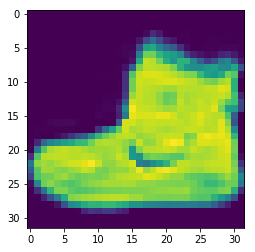

In [79]:
plt.imshow(prd_images)

In [124]:
train_img=[]

In [127]:
train_img.append(cv2.resize(cv2.imread("d:/sample2.jpg"),(32,32)))

In [128]:
train_img.append(cv2.resize(cv2.imread("d:/test.jpg"),(32,32)))
# train_img.append(cv2.imread(""))

In [134]:
train_last = np.array(train_img)

In [135]:
train_last.shape

(2, 32, 32, 3)

In [ ]:
cv2.imread()

In [116]:
prd_images=x_train2[23]

In [118]:
cv2.imwrite("d:/sample2.jpg",prd_images)

True

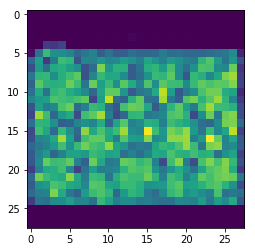

In [117]:
plt.imshow(prd_images)

In [113]:
prd_images.shape

(32, 32)

(32, 32, 3)

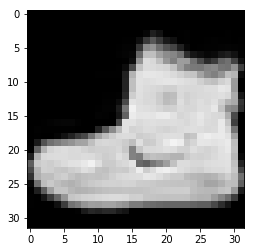

In [98]:

prd_images=x_train2[0]
prd_images = cv2.resize(prd_images,(32,32))
prd_images2 = cv2.cvtColor(prd_images, cv2.COLOR_GRAY2BGR)
plt.imshow(prd_images2)
# esult = model.predict(prd_images)
x_train2.shape
prd_images2.shape

In [100]:
prd_images3 = prd_images2.reshape(1,32,32,3)

In [101]:
prd_images3.shape

(1, 32, 32, 3)

In [136]:
result = model.predict(train_last)

In [139]:
fashion_mnist_labels[np.argmax(result[1])]

'Ankle boot'

In [140]:
def plot_data(X,Y,num_figures):
    plt.figure(figsize=(30,20))
    for i in range(num_figures):
        plt.subplot(2,num_figures,i+1)
        plt.imshow(X[i])
        contents = fashion_mnist_labels[np.argmax(Y[i])]
        plt.title(contents, fontsize=3)
        plt.tight_layout()

In [141]:
for i in range(0,30,6):
    plot_data(iinverse_test[i:], test_predictions[i:],6)

NameError: name 'iinverse_test' is not defined

In [205]:
train_img2 = []

In [206]:
##예측 데이터 입력 8개만 실제로 뽑기
for i in range(0,8):
    prd_images= x_train2[i]
    prd_images = cv2.resize(prd_images,(32,32))
    prd_images2 = cv2.cvtColor(prd_images, cv2.COLOR_GRAY2BGR)
    train_img2.append(prd_images2)

In [207]:
train_lp = np.array(train_img2)
train_lp.shape

(8, 32, 32, 3)

In [208]:
result_lp = model.predict(train_lp)

In [203]:
fashion_mnist_labels[np.argmax(result_lp[2])]

'T-shirt/top'

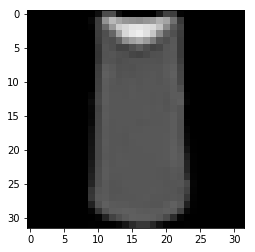

In [202]:
plt.imshow(train_img2[2])

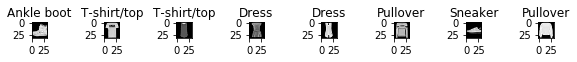

In [229]:
plt.figure(figsize=(32,20))
for i in range(0,len(result_lp)):
#     print(fashion_mnist_labels[np.argmax(result_lp[i])])
    plt.subplot(2,32,i+1)
    plt.imshow(train_img2[i])
    plt.title(fashion_mnist_labels[np.argmax(result_lp[i])], fontsize=12)
    plt.tight_layout()
    
    